<a href="https://colab.research.google.com/github/Sathwik-parimi-07/woc/blob/main/polynomial_regression_man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/woc drive/polynomial_regression_train.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         48000 non-null  int64  
 1   Feature_1  48000 non-null  float64
 2   Feature_2  48000 non-null  float64
 3   Feature_3  48000 non-null  float64
 4   Feature_4  48000 non-null  float64
 5   Feature_5  48000 non-null  float64
 6   Target     48000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.6 MB


,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1,-0.299150,0.980381,-1.244780,0.420551,-0.352235,8.168743e-10
1,2,-0.374319,-1.179867,0.615588,0.054701,0.687182,-5.081225e-10
2,3,-1.240429,-0.139086,-0.001653,0.487685,-0.242808,4.560170e-10
3,4,-0.429881,-1.724246,-0.098046,0.896504,0.318585,-2.647546e-09
4,5,-1.726345,1.945823,1.275979,-0.474670,1.050494,-1.704606e-08


In [ ]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,4.800000e+04
mean,24000.500000,0.014624,-0.001115,0.002485,0.000691,-0.005121,-3.269558e-10
std,13856.550797,1.155884,1.153866,1.153978,1.154967,1.152439,1.068138e-08
min,1.000000,-1.999862,-1.999991,-1.999978,-1.999966,-1.999772,-1.324783e-07
25%,12000.750000,-0.985856,-1.001639,-0.993114,-1.000680,-1.008619,-4.429828e-09
50%,24000.500000,0.026047,-0.003151,0.005507,0.004328,-0.004125,-2.899588e-10
75%,36000.250000,1.015535,0.995264,1.002954,0.997696,0.989219,3.138653e-09
max,48000.000000,1.999643,1.999889,1.999958,1.999699,1.999968,1.059597e-07


In [ ]:
data2=data.drop(columns=['ID'],axis=1)

In [ ]:
x=data2.iloc[:,:-1].values
y=data2.iloc[:,-1].values

In [ ]:
data2.columns[-1]
data2.columns[:-1]

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'], dtype='object')

In [ ]:
#standardisation
#normalisation features
mean=np.mean(x,axis=0)
sd=np.std(x,axis=0)
x=(x-mean)/sd

print(x)

[[-0.2714613   0.8506241  -1.08085056  0.36352986 -0.30120231]
 [-0.33649379 -1.02157784  0.53130124  0.04676399  0.60073514]
 [-1.08580695 -0.11957387 -0.0035855   0.42165651 -0.20624923]
 ...
 [-1.46397092  1.52479322  0.88221825  0.29940981  1.14443348]
 [ 1.12358524  0.27427466 -0.05469282  0.60830112 -0.53226703]
 [-0.87768718 -1.43548731 -0.70636114  0.88144235 -1.0689373 ]]


In [ ]:
#normalisation features

mean=np.mean(y,axis=0)
sd=np.std(y,axis=0)
y=(y-mean)/sd

print(y)

[ 0.10708752 -0.01696116  0.07330339 ... -0.9956769   0.21430545
  0.07742632]


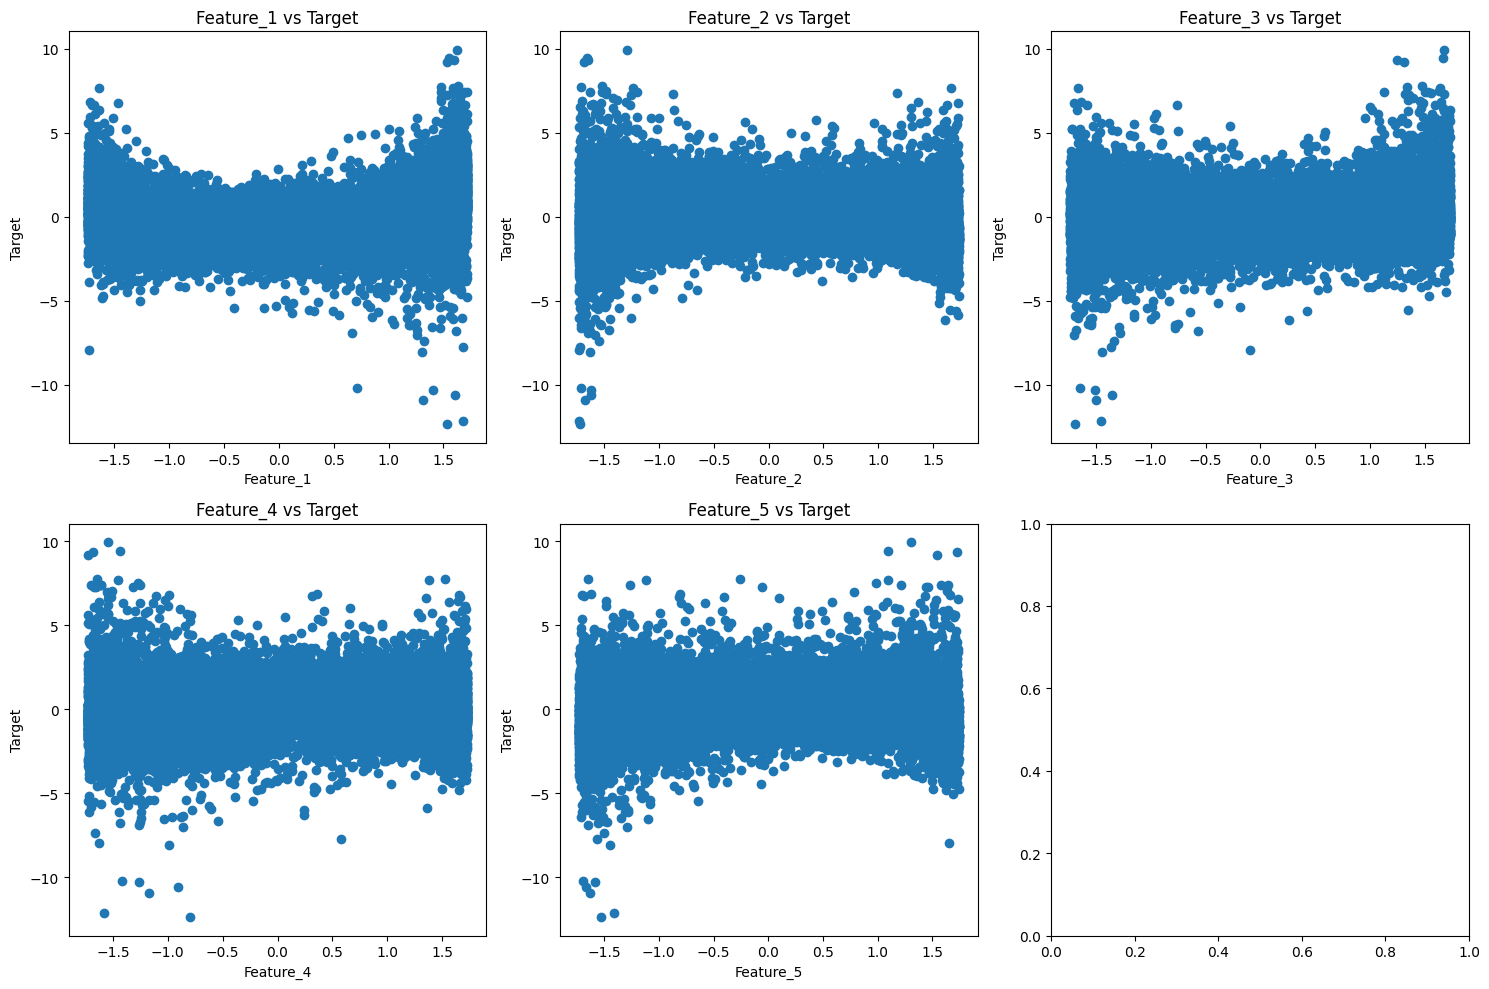

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# List of feature names
features = data2.columns[:-1]

# Flatten the subplot array to make it easier to iterate over
axs = axs.flatten()

# Iterate through each feature and plot it
for i in range(5):
    axs[i].scatter(x[:, i], y)
    axs[i].set_xlabel(features[i])
    axs[i].set_ylabel('Target')
    axs[i].set_title(f'{features[i]} vs Target')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data2.corr()  #concentrate on feature_3>1>4>5>2

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
Feature_1,1.000000,0.000054,0.002807,0.003584,-0.000683,0.115589
Feature_2,0.000054,1.000000,-0.003008,0.003794,0.003933,0.009536
Feature_3,0.002807,-0.003008,1.000000,0.000987,-0.010281,0.136876
Feature_4,0.003584,0.003794,0.000987,1.000000,-0.003775,0.071769
Feature_5,-0.000683,0.003933,-0.010281,-0.003775,1.000000,0.015557
Target,0.115589,0.009536,0.136876,0.071769,0.015557,1.000000


In [ ]:
#indices are our new class ID. LOL #:)
indices = np.arange(len(x))
np.random.shuffle(indices)

# Split indices
train_ratio = 0.8
train_size = int(len(x) * train_ratio)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split features and targets
x_train = x[train_indices]
x_test = x[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(38400, 5) (38400,)
(9600, 5) (9600,)


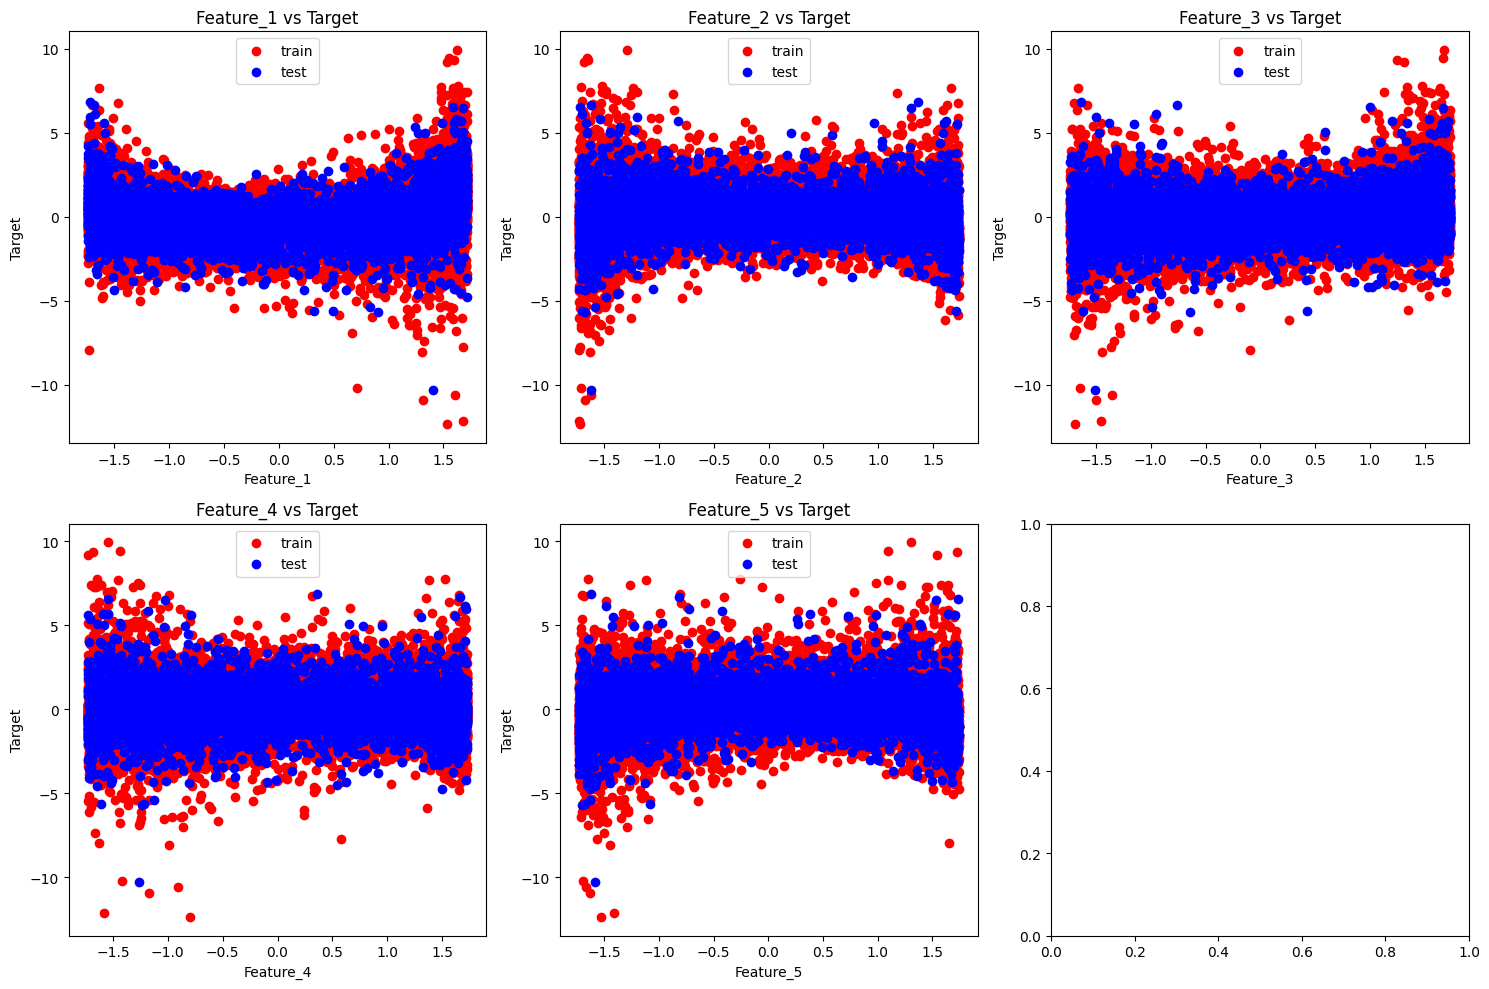

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# List of feature names
features = data2.columns[:-1]

# Flatten the subplot array to make it easier to iterate over
axs = axs.flatten()

# Iterate through each feature and plot it
for i in range(5):
    axs[i].scatter(x_train[:, i], y_train,color='red',label='train')
    axs[i].scatter(x_test[:, i], y_test,color='blue',label='test')
    axs[i].legend(loc='upper center')
    axs[i].set_xlabel(features[i])
    axs[i].set_ylabel('Target')
    axs[i].set_title(f'{features[i]} vs Target')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#our beloved MSE to tell our mistakes.LOL :)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

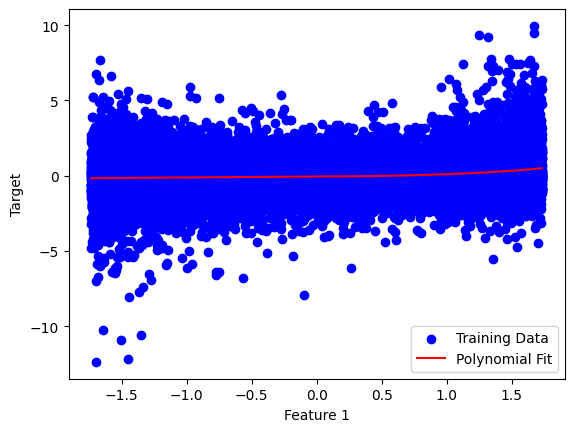

In [ ]:
#concentrate on feature_3>1>4>5>2:             #2.0.3.4.1
coefint0=np.polyfit(x_train[:,0],y_train,3)
coefint1=np.polyfit(x_train[:,1],y_train,0)
coefint2=np.polyfit(x_train[:,2],y_train,4)
coefint3=np.polyfit(x_train[:,3],y_train,2)
coefint4=np.polyfit(x_train[:,4],y_train,1)

x_fit = x_train[:, 2]  # Extracting the first feature (independent variable)
y_fit = np.polyval(coefint2, x_fit)  # Evaluating the polynomial at the x values

# Sort x_fit and compute corresponding y_fit values
sorted_indices = np.argsort(x_fit)  # Get indices that would sort x_fit
x_fit_sorted = x_fit[sorted_indices]  # Sort x_fit
y_fit_sorted = np.polyval(coefint2, x_fit_sorted)  # Compute y_fit for sorted x_fit


# Plotting the data points and the polynomial fit
plt.scatter(x_train[:,2], y_train[:], color='blue', label='Training Data')  # Scatter plot of the actual data
plt.plot(x_fit_sorted, y_fit_sorted, color='red', label='Polynomial Fit')  # Plot of the polynomial fit
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

In [ ]:
print(coefint0)
print(coefint1)
print(coefint2)
print(coefint3)
print(coefint4)

[ 0.01733439  0.37327522  0.09219674 -0.37326879]
[-0.00056108]
[ 0.00925535  0.04178495  0.048774    0.06614482 -0.0657541 ]
[-0.04627456  0.07677162  0.04627864]
[ 0.01587386 -0.0005762 ]


In [ ]:
print(x[:1,:])

[[-0.2714613   0.8506241  -1.08085056  0.36352986 -0.30120231]]


In [ ]:
y_pred=coefint2[0]*x_train[:,2]**4 +(coefint0[0]+coefint2[1])*x_train[:,0]**3+coefint3[0]*x_train[:,3]**2+coefint4[0]*x_train[:,4]-coefint1[0]+0.048

print(y_pred[:100])
print(" _______The comparision _______")
print(y_train[:100])


[-2.35844647e-01  4.31360362e-02 -2.38090929e-01  7.61252237e-02
  6.29354720e-02 -5.48653384e-02  9.65001299e-02 -6.00032962e-02
 -6.08985639e-02 -6.07756637e-02  3.92350622e-02  1.10835882e-01
  7.85285443e-03 -6.43628069e-02  2.50109761e-01  4.90569868e-02
  6.65779808e-02  1.16744874e-01  1.57611356e-01  2.58083147e-04
  2.79872476e-01 -3.93595103e-02 -1.95338254e-01  7.52994400e-02
  1.36485601e-02  7.77377431e-02 -1.05644930e-01 -3.47056815e-02
 -4.15158030e-04 -2.81617826e-01  1.78049174e-02 -2.07163457e-01
 -1.31017877e-01  9.16280551e-02  6.20397055e-02 -2.84580982e-01
 -4.16185865e-02  4.10207877e-02  1.03715968e-01 -1.09753535e-02
  1.43719563e-01 -2.24725138e-02  1.28283722e-01  3.73060627e-02
 -2.86896280e-01  2.06622144e-01 -5.90199203e-02 -1.39727104e-02
  2.48890136e-01 -2.29778398e-02  2.61379838e-02  6.84549126e-02
  2.56843446e-02 -8.81518784e-02  4.23096181e-02  3.34719817e-02
  9.07353422e-02 -4.21274320e-02  6.63631677e-02 -1.83939477e-01
  9.22239109e-02 -8.05097

In [ ]:
mean= mean_squared_error(y_train, y_pred)
print(mean)                                           #seems somewhat better!!

0.9852944227628363


In [ ]:
import numpy as np

def r2_score(y_true, y_pred):

    # Compute the total sum of squares (variance of the true values)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)

    # Compute the residual sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)

    # Calculate the R² score
    r2 = 1 - (ss_residual / ss_total)

    return r2


In [ ]:
# Example data
y_true = y_train
y_pred = y_pred

# Calculate R² score
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)
                                                               #R² Score: 0.010725618032016437   0.011373117260710996  0.017175096673179735

R² Score: 0.015798101043385193


In [ ]:
ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
ss_residual = np.sum((y_true - y_pred) ** 2)

print("SS Total:", ss_total)
print("SS Residual:", ss_residual)
print("R² Score:", 1 - ss_residual / ss_total)


SS Total: 38442.62632921495
SS Residual: 37835.30583409291
R² Score: 0.015798101043385193
